## COVID STATS WEB SCRAPING and ANALYSIS FOR USA STATES
## SCRIPT is 100% in working state as of 4/29/2020

In [1]:
import pandas as pd
#import geopandas as gpd
import requests
from bs4 import BeautifulSoup
import re
from datetime import date
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pyodbc
from datetime import datetime

### Scraping new Data from www.worldometers.info

In [2]:
r = requests.get("https://www.worldometers.info/coronavirus/country/us/", headers={'User-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:61.0) Gecko/20100101 Firefox/61.0'})
c = r.content
soup=BeautifulSoup(c,"html.parser")

#print(soup.prettify)
x1 = soup.title.string
s = ''.join(x for x in x1 if x.isdigit())
today = date.today()

In [4]:
z = print(today)

2020-05-02


### Listing all the cases reported and Deaths occured till today

In [5]:
cases = s[0:6]
print('Cases Reported: as of ',today,' is ',cases)
deaths = s[7:13]
print('Deaths Reported: as of ',today,' is ',deaths)
table = soup.find('table')
table_rows = table.find_all('tr')
List = [] 

Cases Reported: as of  2020-05-02  is  116077
Deaths Reported: as of  2020-05-02  is  67444


### Loooping to find the state Wise Division of cases

In [6]:
for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    #print(row)
    List.append(row)
df = pd.DataFrame(List) 
df

,0,1,2,3,4,5,6,7,8,9,10
0,None,None,None,None,None,None,None,None,None,None,None
1,USA Total,"1,160,774",,"67,444",,"932,218","3,507",204,"6,931,132","20,940",
2,\nNew York,"319,213",\n,"\n24,368",,"\n244,278","16,271","1,242","\n959,017","48,883",\n[1] [2] [3] [4] [5] [6] [7] [8] [9] [10]
3,\nNew Jersey,"123,717",\n,"\n7,742",,"\n114,704","13,929",872,"\n260,641","29,345",\n[1] [2] [3]
4,\nMassachusetts,"66,263",\n,"\n 3,846",,"\n54,299","9,701",563,"\n298,994","43,775",\n[1] [2]
...,...,...,...,...,...,...,...,...,...,...,...
60,\nFederal Prisons,"2,268",\n,\n37,,"\n1,569",,,\n,,\n[1]
61,\nGrand Princess Ship,103,\n,\n3,,\n100,,,\n,,\n[1]
62,\nWuhan Repatriated,3,\n,\n,,\n3,,,\n3\n,,\n
63,\nDiamond Princess Ship,46,\n,\n,,\n46,,,\n46\n,,\n


### Arranging the data in the columnar format

In [7]:
df = pd.DataFrame(List) 
df = df.iloc[1:,0:6]
df.columns = ['State', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Active_Cases']
df['State'] = df['State'].str[1:]
df['New_Cases'] = df['New_Cases'].str[1:]
df['Total_Deaths'] = df['Total_Deaths'].str[1:]
df['Active_Cases'] = df['Active_Cases'].str[1:]
df

,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases
1,SA Total,"1,160,774",,"7,444",,"32,218"
2,New York,"319,213",,"24,368",,"244,278"
3,New Jersey,"123,717",,"7,742",,"114,704"
4,Massachusetts,"66,263",,"3,846",,"54,299"
5,Illinois,"58,505",,"2,559",,"55,340"
...,...,...,...,...,...,...
60,Federal Prisons,"2,268",,37,,"1,569"
61,Grand Princess Ship,103,,3,,100
62,Wuhan Repatriated,3,,,,3
63,Diamond Princess Ship,46,,,,46


### Cleaning the data

In [8]:
def remove(string): 
    return string.replace(" ", "")

df['New_Cases'] = df['New_Cases'].str.replace('+', '')
df['New_Cases'] = df['New_Cases'].str.replace(',','')
remove(df['New_Cases'])

df['New_Deaths'] = df['New_Deaths'].str.replace('+', '')
df['New_Deaths'] = df['New_Deaths'].str.replace(',', '')
df['New_Deaths'] = df['New_Deaths'].str.strip()
remove(df['New_Deaths'])

df['Total_Cases'] = df['Total_Cases'].str.replace(',', '')
df['Total_Cases'] = df['Total_Cases'].str.replace('+', '')
remove(df['Total_Cases'])

df['Total_Deaths'] = df['Total_Deaths'].str.replace(',', '')
df['Total_Deaths'] = df['Total_Deaths'].str.replace('+', '')
remove(df['Total_Deaths'])

df['Active_Cases'] = df['Active_Cases'].str.replace(',', '')
df['Active_Cases'] = df['Active_Cases'].str.replace('+', '')
remove(df['Active_Cases'] )

df.fillna(0)
#df.replace('',0)

df

,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases
1,SA Total,1160774,,7444,,32218
2,New York,319213,,24368,,244278
3,New Jersey,123717,,7742,,114704
4,Massachusetts,66263,,3846,,54299
5,Illinois,58505,,2559,,55340
...,...,...,...,...,...,...
60,Federal Prisons,2268,,37,,1569
61,Grand Princess Ship,103,,3,,100
62,Wuhan Repatriated,3,,,,3
63,Diamond Princess Ship,46,,,,46


### Converting to Integer Format Replacing Blanks with 0's

In [9]:
def convert_fill(df):
    return df.stack().apply(pd.to_numeric, errors='ignore').fillna(0).unstack()

df  = convert_fill(df)

df['Total_Cases'] = df['Total_Cases'].astype(int)

df['Total_Deaths'] = df['Total_Deaths'].astype(int)

df['New_Cases'] = df['New_Cases'].astype(int)

df['Active_Cases'] = df['Active_Cases'].astype(int)

df['Active_Cases'] = df['Active_Cases'].astype(int)

df['New_Deaths'] = df['New_Deaths'].astype(int)

df

,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases
1,SA Total,1160774,0,7444,0,32218
2,New York,319213,0,24368,0,244278
3,New Jersey,123717,0,7742,0,114704
4,Massachusetts,66263,0,3846,0,54299
5,Illinois,58505,0,2559,0,55340
...,...,...,...,...,...,...
60,Federal Prisons,2268,0,37,0,1569
61,Grand Princess Ship,103,0,3,0,100
62,Wuhan Repatriated,3,0,0,0,3
63,Diamond Princess Ship,46,0,0,0,46


In [10]:
df

,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases
1,SA Total,1160774,0,7444,0,32218
2,New York,319213,0,24368,0,244278
3,New Jersey,123717,0,7742,0,114704
4,Massachusetts,66263,0,3846,0,54299
5,Illinois,58505,0,2559,0,55340
...,...,...,...,...,...,...
60,Federal Prisons,2268,0,37,0,1569
61,Grand Princess Ship,103,0,3,0,100
62,Wuhan Repatriated,3,0,0,0,3
63,Diamond Princess Ship,46,0,0,0,46


In [11]:
dfplot = df.head(10)

### Plotting Total Cases, Active Cases and Total Deaths of top 6 US states

In [12]:
dfplot = dfplot[1:7]

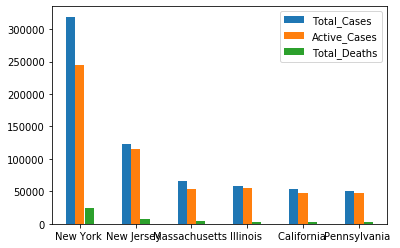

In [13]:
Total_Cases = dfplot['Total_Cases'].values.tolist()
Total_Deaths = dfplot['Total_Deaths'].values.tolist()
Active_Cases = dfplot['Active_Cases'].values.tolist()

State = dfplot['State'].values.tolist()
index = State
dfplot1 = pd.DataFrame({'Total_Cases': Total_Cases,
                      'Active_Cases': Active_Cases,
                      'Total_Deaths': Total_Deaths}, index = index)

ax = dfplot1.plot.bar(rot=0)

In [14]:
#dfplot = df.head(10)

### Plotting top 6 States in a TreeMap

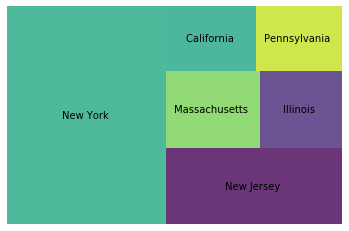

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
my_values=[i**3 for i in range(1,1000)]
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

# If you have 2 lists
# squarify.plot(sizes=Total_Cases, label=State, alpha=.7, color = colors)
# plt.axis('off')
# plt.show()

squarify.plot(sizes=Total_Cases, label=State, alpha=.8 )
plt.axis('off')
plt.show()

### I want to automate and store daily csv files with time and date to gather data and then integrate it all together to perform periodic analysis please provide your valuable feedback so that I can further on develop other aspects to this project.


### Connecting to SQL SERVER to store data in relational format

In [16]:
#Define the server name and the database name
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')


cursor = cnxn.cursor()


# insert_query = '''IN'''



### Inserting DATA to the SQL SERVER

In [17]:
for index,row in df.iterrows():
    cursor.execute("""INSERT INTO US_State_Records ([State],
                   [Total_Cases],[New_Cases],[Total_Deaths],[New_Deaths],[Active_Cases], [Date])
     VALUES (?,?,?,?,?,?,?)""", 
                            row['State'], 
                            row['Total_Cases'], 
                            row['New_Cases'],
                            row['Total_Deaths'],
                            row['New_Deaths'],
                            row['Active_Cases'],
                            datetime.now()) 
cnxn.commit()
cursor.close()
cnxn.close()

### Checking the data in SQL Sever

In [18]:
server = 'Jayshil'
database = 'usacovid19'

#define our connection string

cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};\
                        SERVER='+server+';\
                        DATABASE='+ database+';\
                        Trusted_Connection=yes;')
cursor = cnxn.cursor()

SQL_Query = pd.read_sql_query('''SELECT * FROM [US_State_Records]''', cnxn)
SQL_Query

cursor.close()

In [19]:
SQL_Query

,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Active_Cases,Date
0,SA Total,1064572,378,1669,13,55492,2020-04-30 03:52:55.570
1,New York,306158,0,23474,0,234511,2020-04-30 03:52:55.573
2,New Jersey,116264,0,6770,0,108223,2020-04-30 03:52:55.573
3,Massachusetts,60265,0,3405,0,48742,2020-04-30 03:52:55.577
4,Illinois,50355,0,2215,0,47534,2020-04-30 03:52:55.577
...,...,...,...,...,...,...,...
315,Navajo Nation,2141,0,71,0,2070,2020-05-01 21:05:25.100
316,Grand Princess Ship,103,0,3,0,100,2020-05-01 21:05:25.103
317,Wuhan Repatriated,3,0,0,0,3,2020-05-01 21:05:25.107
318,Diamond Princess Ship,46,0,0,0,46,2020-05-01 21:05:25.110


In [20]:
x = '\nMassachusetts'

In [21]:
x[1:]

'Massachusetts'

In [ ]:
C:\Users\jaysh\COVID_19_USA_STATES_Data_Web_Scraping.ipynb

In [ ]:
jupyter nbconvert — to script ‘COVID19USASTATESWebScraping.ipynb’